# Correlationn and Mutual information

Here, I test two ideas:
 - if two variables are tightly corelated, can we drop one from mthe subset tests 
 - if two attributes have high mutual information, can we skip conditioning on one?

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import detect_simpsons_paradox as dsp
import data_util as sp_dat

How do correlated variables and high mutual informaation among the attributes impact

In [114]:
N = 100
# sample data from 2 clusters
mu = np.asarray([[1,1,-5],[5, 5, 7]])
cov = np.asarray([[.6,-1, 1],[0,.6, 1],[-.5,1,.6]])

latent_df = sp_dat.simple_regression_sp(N,mu,cov)
latent_df['x4'] = np.random.rand(N) + 1*latent_df['x2']


['x1', 'x2', 'x3']


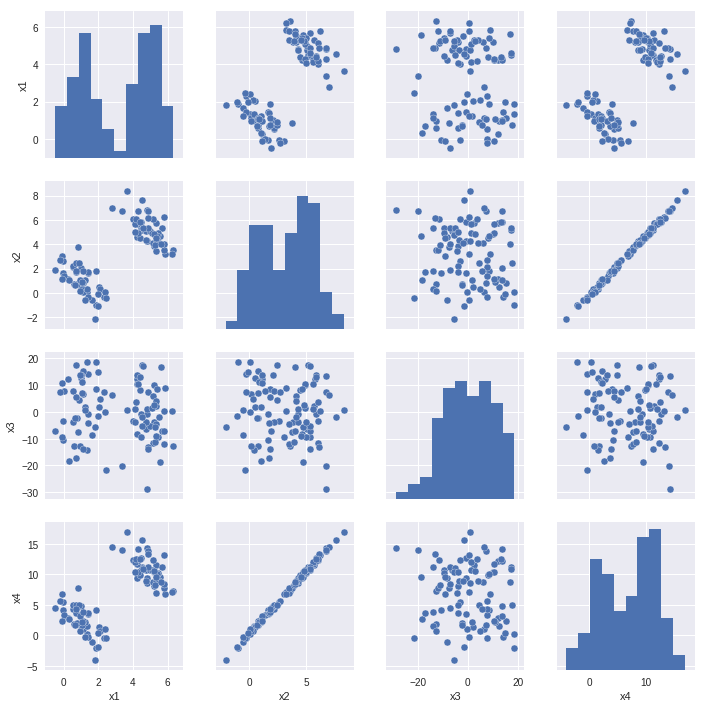

In [115]:
sns.pairplot(data=latent_df)
plt.show()

In [113]:
latent_df.corr()

,x1,x2,x3,x4
x1,1.000000,0.577739,0.094722,0.586021
x2,0.577739,1.000000,0.023676,0.998438
x3,0.094722,0.023676,1.000000,0.027475
x4,0.586021,0.998438,0.027475,1.000000


In [106]:
latent_df.groupby('color').corr()


x1        x2        x3        x4
color                                           
b     x1  1.000000 -0.846146  0.040235 -0.844217
      x2 -0.846146  1.000000 -0.111944  0.994099
      x3  0.040235 -0.111944  1.000000 -0.093614
      x4 -0.844217  0.994099 -0.093614  1.000000
r     x1  1.000000 -0.731186 -0.137186 -0.721250
      x2 -0.731186  1.000000  0.149551  0.993520
      x3 -0.137186  0.149551  1.000000  0.181351
      x4 -0.721250  0.993520  0.181351  1.000000

In [117]:
latent_df.head()

,x1,x2,x3,color,x4
0,4.521627,5.191069,17.503140,b,11.207939
1,4.840978,4.295359,-0.702967,b,9.432786
2,1.325660,0.032961,18.693166,r,0.292818
3,1.864237,-1.033772,18.626722,r,-2.038838
4,4.790605,4.257925,1.037528,b,8.673808


now we'll add correlationnw ith the cluster and the nother varaible that is  conditioantl

In [120]:
sgn = {'b':-1,'r':1}

latent_df['x4'] = np.random.rand(N) + sgn[latent_df['color']]*latent_df['x2']


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [119]:
sgn[latent_df['color']]

TypeError: 'Series' objects are mutable, thus they cannot be hashed